In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('heart_disease_dataset.csv')

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [6]:
print(df.shape)

(1190, 12)


In [7]:
#-- Value 0: normal 
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#-- Value 2: showing probable or definite left ventricular 
#hypertrophy by Estes' criteria
df['resting ecg'].value_counts()

resting ecg
0    684
2    325
1    181
Name: count, dtype: int64

In [8]:
df['chest pain type'].value_counts()

chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64

In [9]:
df['ST slope'].value_counts()

ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64

In [10]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

In [11]:
pd.get_dummies(df['target'])

,0,1
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
...,...,...
1185,False,True
1186,False,True
1187,False,True
1188,False,True


In [12]:
pd.get_dummies(df['chest pain type'])

,1,2,3,4
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
1185,True,False,False,False
1186,False,False,False,True
1187,False,False,False,True
1188,False,True,False,False


In [13]:
pd.get_dummies(df['resting ecg'])

,0,1,2
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1185,True,False,False
1186,True,False,False
1187,True,False,False
1188,False,False,True


In [14]:
pd.get_dummies(df['ST slope'])

,0,1,2,3
0,False,True,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,True,False,False
...,...,...,...,...
1185,False,False,True,False
1186,False,False,True,False
1187,False,False,True,False
1188,False,False,True,False


In [15]:
#hot encode
#-- Value 0: normal 
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
df.columns = df.columns.str.replace('target', 'heartdisease')
df = pd.concat([df.drop(['resting ecg'], axis=1), pd.get_dummies(df['resting ecg']).add_prefix('ecg_').astype(int)], axis=1)
#deleted 'chest pain type' column and then added new 4 columns etc 'chestpaintype_1', 'chestpaintype_2', 'chestpaintype_3', 'chestpaintype_4'
df = pd.concat([df.drop(['chest pain type'], axis=1), pd.get_dummies(df['chest pain type']).add_prefix('chestpaintype_').astype(int)], axis=1)
#deleted 'ST slope' column and then added new 3 columns etc 'STslope_1', 'STslope_2', 'STslope_3', 'STslope_0'
#--Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 
df = pd.concat([df.drop(['ST slope'], axis=1), pd.get_dummies(df['ST slope']).add_prefix('STslope_').astype(int)], axis=1)
#--Value 1: heart disease -- Value 0: normal
df

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heartdisease,ecg_0,ecg_1,ecg_2,chestpaintype_1,chestpaintype_2,chestpaintype_3,chestpaintype_4,STslope_0,STslope_1,STslope_2,STslope_3
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,1,0,0,0,0,1,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,1,0,0,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1,1,0,0,1,0,0,0,0,0,1,0
1186,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,0,1,0,0,1,0
1187,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,0,1,0,0,1,0
1188,57,0,130,236,0,174,0,0.0,1,0,0,1,0,1,0,0,0,0,1,0


In [16]:
df.heartdisease.value_counts()

heartdisease
1    629
0    561
Name: count, dtype: int64

<Axes: >

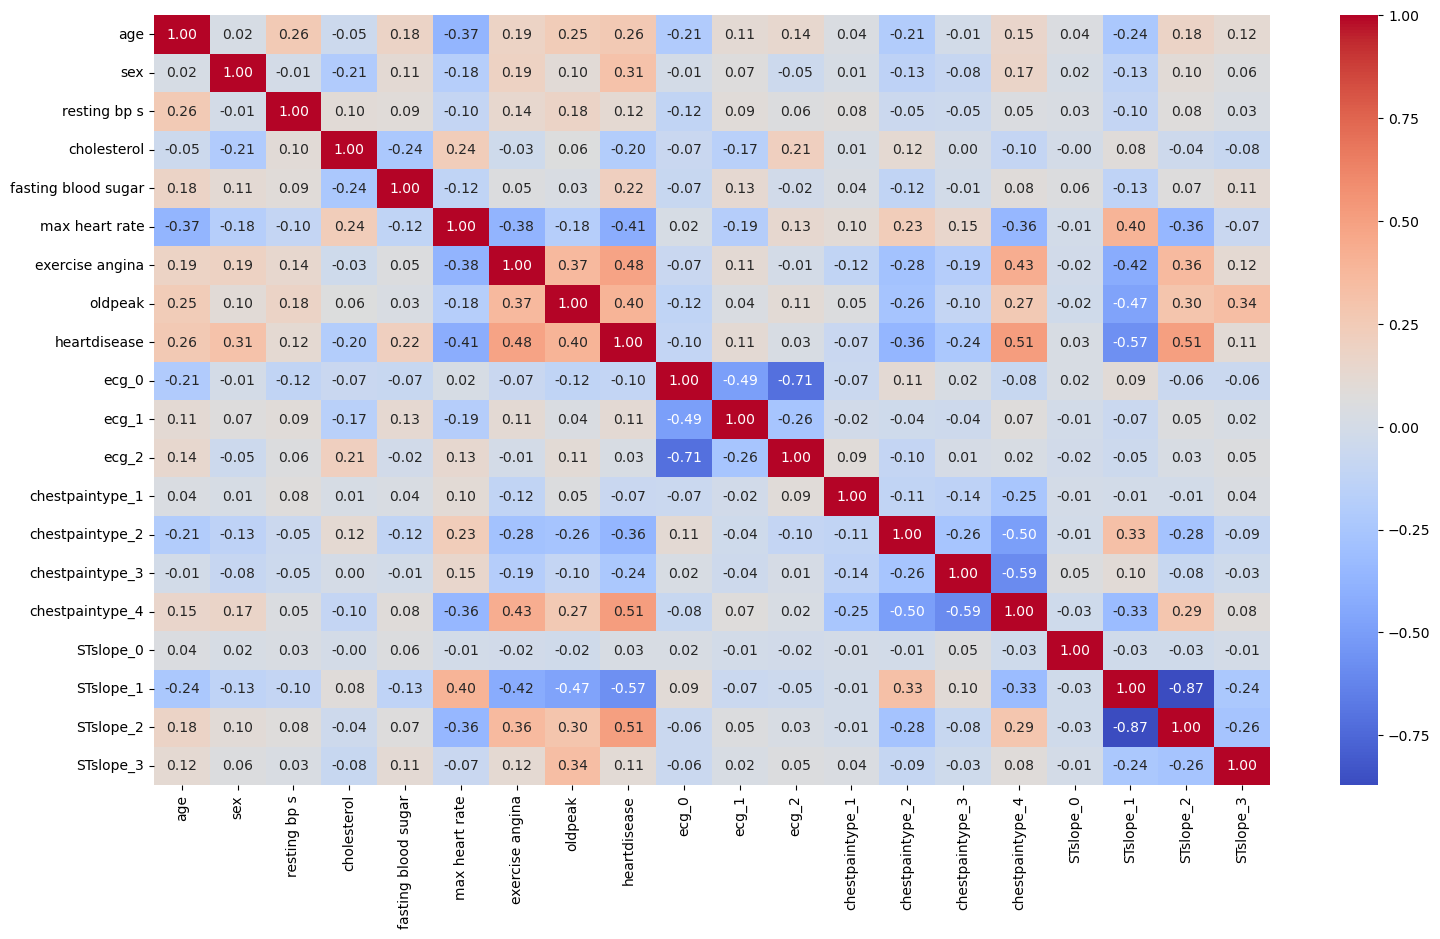

In [17]:
#correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),fmt='.2f', annot=True, cmap='coolwarm')

In [18]:
df.corr()

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heartdisease,ecg_0,ecg_1,ecg_2,chestpaintype_1,chestpaintype_2,chestpaintype_3,chestpaintype_4,STslope_0,STslope_1,STslope_2,STslope_3
age,1.000000,0.015096,0.257692,-0.046472,0.178923,-0.368676,0.188095,0.245093,0.262029,-0.212894,0.114732,0.143746,0.036686,-0.205696,-0.014097,0.153974,0.044271,-0.238016,0.175015,0.116873
sex,0.015096,1.000000,-0.006443,-0.208441,0.110961,-0.181837,0.194380,0.096390,0.311267,-0.005940,0.070195,-0.049987,0.013701,-0.133443,-0.084463,0.168731,0.016124,-0.130653,0.100658,0.055989
resting bp s,0.257692,-0.006443,1.000000,0.099037,0.088235,-0.101357,0.142435,0.176111,0.121415,-0.117866,0.092290,0.056395,0.075755,-0.053458,-0.046173,0.045907,0.028187,-0.096754,0.078235,0.032263
cholesterol,-0.046472,-0.208441,0.099037,1.000000,-0.239778,0.238028,-0.033261,0.057451,-0.198366,-0.072163,-0.166833,0.214537,0.014486,0.117967,0.003310,-0.100516,-0.004395,0.083949,-0.043906,-0.077884
fasting blood sugar,0.178923,0.110961,0.088235,-0.239778,1.000000,-0.118689,0.053053,0.031193,0.216695,-0.074659,0.127733,-0.020114,0.035059,-0.117614,-0.011586,0.084591,0.055671,-0.129144,0.068823,0.111648
max heart rate,-0.368676,-0.181837,-0.101357,0.238028,-0.118689,1.000000,-0.377691,-0.183688,-0.413278,0.016446,-0.187757,0.133085,0.103442,0.234945,0.149011,-0.355801,-0.008792,0.396011,-0.357179,-0.070944
exercise angina,0.188095,0.194380,0.142435,-0.033261,0.053053,-0.377691,1.000000,0.370772,0.481467,-0.073198,0.109909,-0.007369,-0.117331,-0.280502,-0.188941,0.431375,-0.023062,-0.419483,0.357282,0.120686
oldpeak,0.245093,0.096390,0.176111,0.057451,0.031193,-0.183688,0.370772,1.000000,0.398385,-0.124253,0.036802,0.108205,0.054764,-0.264862,-0.100963,0.265416,-0.024645,-0.469316,0.296381,0.340003
heartdisease,0.262029,0.311267,0.121415,-0.198366,0.216695,-0.413278,0.481467,0.398385,1.000000,-0.104003,0.109356,0.027257,-0.072710,-0.363252,-0.235606,0.514579,0.027388,-0.569569,0.509766,0.108184
ecg_0,-0.212894,-0.005940,-0.117866,-0.072163,-0.074659,0.016446,-0.073198,-0.124253,-0.104003,1.000000,-0.492432,-0.712667,-0.066365,0.113978,0.021298,-0.075716,0.024943,0.094673,-0.063002,-0.064506


In [19]:
correlations=df.corr()['heartdisease'].abs()
sorted_correlations=correlations.sort_values()
num_cols_to_drop=int(0.5 * len(df.columns))
cols_to_drop= sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped=df.drop(cols_to_drop, axis=1)
cols_to_drop

Index(['ecg_2', 'STslope_0', 'chestpaintype_1', 'ecg_0', 'STslope_3', 'ecg_1',
       'resting bp s', 'cholesterol', 'fasting blood sugar',
       'chestpaintype_3'],
      dtype='object')

In [20]:
df_dropped.head()
df_dropped.corr()

,age,sex,max heart rate,exercise angina,oldpeak,heartdisease,chestpaintype_2,chestpaintype_4,STslope_1,STslope_2
age,1.000000,0.015096,-0.368676,0.188095,0.245093,0.262029,-0.205696,0.153974,-0.238016,0.175015
sex,0.015096,1.000000,-0.181837,0.194380,0.096390,0.311267,-0.133443,0.168731,-0.130653,0.100658
max heart rate,-0.368676,-0.181837,1.000000,-0.377691,-0.183688,-0.413278,0.234945,-0.355801,0.396011,-0.357179
exercise angina,0.188095,0.194380,-0.377691,1.000000,0.370772,0.481467,-0.280502,0.431375,-0.419483,0.357282
oldpeak,0.245093,0.096390,-0.183688,0.370772,1.000000,0.398385,-0.264862,0.265416,-0.469316,0.296381
heartdisease,0.262029,0.311267,-0.413278,0.481467,0.398385,1.000000,-0.363252,0.514579,-0.569569,0.509766
chestpaintype_2,-0.205696,-0.133443,0.234945,-0.280502,-0.264862,-0.363252,1.000000,-0.495294,0.327161,-0.277562
chestpaintype_4,0.153974,0.168731,-0.355801,0.431375,0.265416,0.514579,-0.495294,1.000000,-0.329566,0.287250
STslope_1,-0.238016,-0.130653,0.396011,-0.419483,-0.469316,-0.569569,0.327161,-0.329566,1.000000,-0.870800
STslope_2,0.175015,0.100658,-0.357179,0.357282,0.296381,0.509766,-0.277562,0.287250,-0.870800,1.000000


<Axes: >

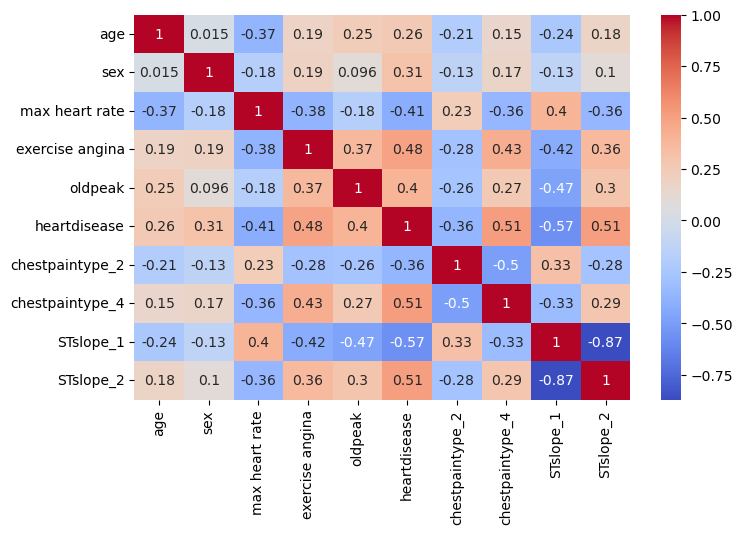

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [22]:
df.columns.values

array(['age', 'sex', 'resting bp s', 'cholesterol', 'fasting blood sugar',
       'max heart rate', 'exercise angina', 'oldpeak', 'heartdisease',
       'ecg_0', 'ecg_1', 'ecg_2', 'chestpaintype_1', 'chestpaintype_2',
       'chestpaintype_3', 'chestpaintype_4', 'STslope_0', 'STslope_1',
       'STslope_2', 'STslope_3'], dtype=object)

In [23]:
#training forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df= train_test_split(df, test_size=0.3)

In [24]:
train_df

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heartdisease,ecg_0,ecg_1,ecg_2,chestpaintype_1,chestpaintype_2,chestpaintype_3,chestpaintype_4,STslope_0,STslope_1,STslope_2,STslope_3
377,47,1,155,0,0,118,1,1.0,1,1,0,0,0,0,1,0,0,0,1,0
392,70,1,115,0,0,92,1,0.0,1,0,1,0,0,0,0,1,0,0,1,0
168,48,1,140,238,0,118,0,0.0,0,1,0,0,0,1,0,0,0,1,0,0
512,63,1,160,267,1,88,1,2.0,1,0,1,0,0,0,0,1,0,0,1,0
741,54,1,125,273,0,152,0,0.5,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,41,0,126,306,0,163,0,0.0,0,1,0,0,0,1,0,0,0,1,0,0
1118,55,0,180,327,0,117,1,3.4,1,0,1,0,0,0,0,1,0,0,1,0
980,44,0,108,141,0,175,0,0.6,0,1,0,0,0,0,1,0,0,0,1,0
700,41,1,130,214,0,168,0,2.0,0,0,0,1,0,0,1,0,0,0,1,0


In [25]:
test_df

,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,heartdisease,ecg_0,ecg_1,ecg_2,chestpaintype_1,chestpaintype_2,chestpaintype_3,chestpaintype_4,STslope_0,STslope_1,STslope_2,STslope_3
393,61,1,130,0,0,115,0,0.0,1,0,0,1,0,0,0,1,0,0,1,0
1088,64,0,180,325,0,154,1,0.0,0,1,0,0,0,0,0,1,0,1,0,0
139,43,1,150,247,0,130,1,2.0,1,1,0,0,0,0,0,1,0,0,1,0
872,71,0,160,302,0,162,0,0.4,0,1,0,0,0,1,0,0,0,1,0,0
845,58,0,150,283,1,162,0,1.0,0,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,61,1,141,292,0,115,1,1.7,1,0,1,0,0,0,0,1,0,0,1,0
1165,57,1,154,232,0,164,0,0.0,1,0,0,1,0,1,0,0,0,1,0,0
196,62,0,160,193,0,116,0,0.0,0,1,0,0,1,0,0,0,0,1,0,0
239,48,1,160,355,0,99,1,2.0,1,1,0,0,0,0,0,1,0,0,1,0


In [26]:
train_X=train_df.drop('heartdisease', axis=1)
train_y=train_df['heartdisease']

test_X=test_df.drop('heartdisease', axis=1)
test_y=test_df['heartdisease']

In [27]:
forest=RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [28]:
forest.score(test_X,test_y)

0.9159663865546218

In [29]:
forest.feature_importances_

array([0.07963347, 0.03973276, 0.0792412 , 0.0952265 , 0.0212625 ,
       0.0959511 , 0.08061768, 0.11360826, 0.01239345, 0.00708406,
       0.01597835, 0.0083265 , 0.02295594, 0.01783787, 0.09502403,
       0.00070767, 0.14591413, 0.06192475, 0.00657978])

In [30]:
forest.feature_names_in_

array(['age', 'sex', 'resting bp s', 'cholesterol', 'fasting blood sugar',
       'max heart rate', 'exercise angina', 'oldpeak', 'ecg_0', 'ecg_1',
       'ecg_2', 'chestpaintype_1', 'chestpaintype_2', 'chestpaintype_3',
       'chestpaintype_4', 'STslope_0', 'STslope_1', 'STslope_2',
       'STslope_3'], dtype=object)

In [31]:
#Feature Importances
importances= dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances={k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [32]:
importances

{'STslope_1': 0.1459141319700464,
 'oldpeak': 0.11360826084817706,
 'max heart rate': 0.09595110175624033,
 'cholesterol': 0.09522649777699184,
 'chestpaintype_4': 0.09502402678103633,
 'exercise angina': 0.08061768183381587,
 'age': 0.07963346804983955,
 'resting bp s': 0.07924119628663494,
 'STslope_2': 0.0619247474634473,
 'sex': 0.039732764056875085,
 'chestpaintype_2': 0.02295594096381886,
 'fasting blood sugar': 0.021262497859615582,
 'chestpaintype_3': 0.0178378701419615,
 'ecg_2': 0.015978352933017585,
 'ecg_0': 0.012393454410079035,
 'chestpaintype_1': 0.008326497780477275,
 'ecg_1': 0.007084056650963706,
 'STslope_3': 0.006579782455222613,
 'STslope_0': 0.0007076699817391503}

In [33]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[50,100,250],
    'max_depth':[5,10,30,None],
    'min_samples_split':[2,4],
    'max_features':['sqrt', 'log2']
}
grid_Search=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid, verbose=10)

In [34]:
grid_Search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.862 total time=   0.0s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.844 total time=   0.0s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.868 total time=   0.0s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.861 total time=   0.0s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [35]:
grid_Search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', n_estimators=50)

In [36]:
forest=grid_Search.best_estimator_

In [37]:
forest.score(test_X, test_y)

0.9243697478991597

In [38]:
importances= dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances={k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [39]:
importances

{'oldpeak': 0.11642378909496398,
 'STslope_1': 0.10803513169779291,
 'max heart rate': 0.1043249731729204,
 'chestpaintype_4': 0.09901697281549668,
 'cholesterol': 0.08883504151023369,
 'exercise angina': 0.08805499472564239,
 'STslope_2': 0.08703168259730094,
 'age': 0.0809640080727811,
 'resting bp s': 0.07676888137859979,
 'sex': 0.03816847308944804,
 'chestpaintype_2': 0.02437233942480495,
 'fasting blood sugar': 0.02000247729507189,
 'ecg_2': 0.01598635811838431,
 'chestpaintype_3': 0.01563935855196646,
 'ecg_0': 0.011349362090899087,
 'chestpaintype_1': 0.010018211457224443,
 'ecg_1': 0.008688059894210842,
 'STslope_3': 0.005730305931498631,
 'STslope_0': 0.0005895790807595392}

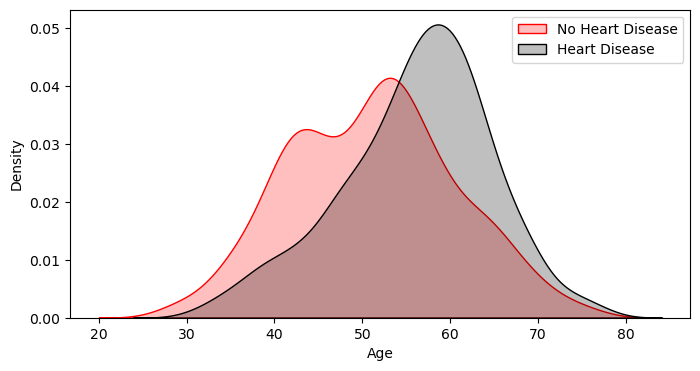

In [40]:
# KDE (Kernel Density Estimation) graphic
plt.figure(figsize=(8, 4))
sns.kdeplot(df[df['heartdisease'] == 0]['age'], color='red', label='No Heart Disease', fill=True)
sns.kdeplot(df[df['heartdisease'] == 1]['age'], color='black', label='Heart Disease', fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


In [41]:
#Logistic Regression Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df[['age']] 
y = df['heartdisease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.6092436974789915
Confusion Matrix:
[[58 49]
 [44 87]]
